# Exercise 2: Introduction to Deep Learning

<div>
    <table>
        <tr style="background-color:white">
            <td>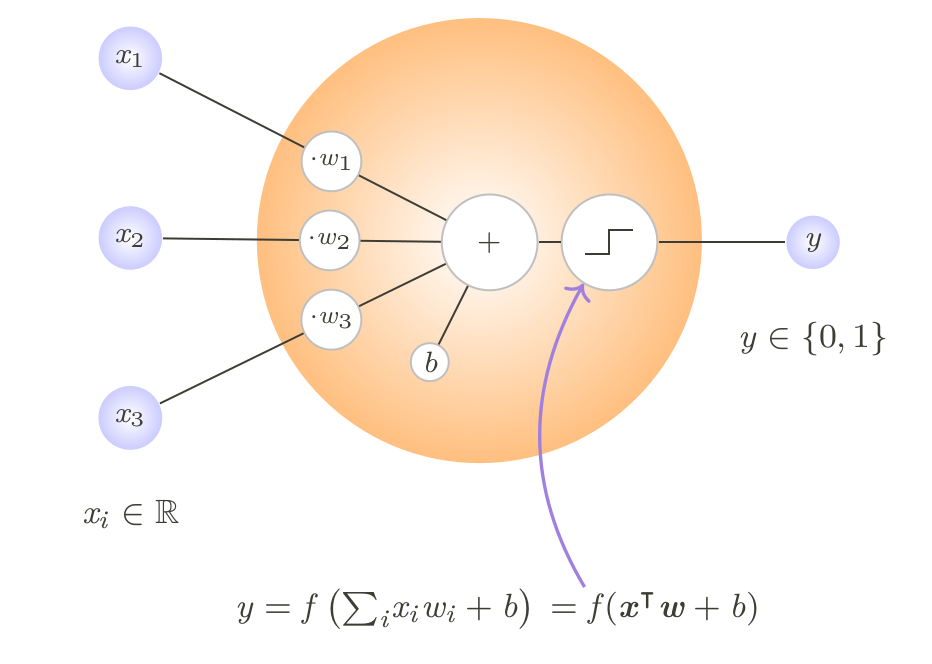</td>
            <td>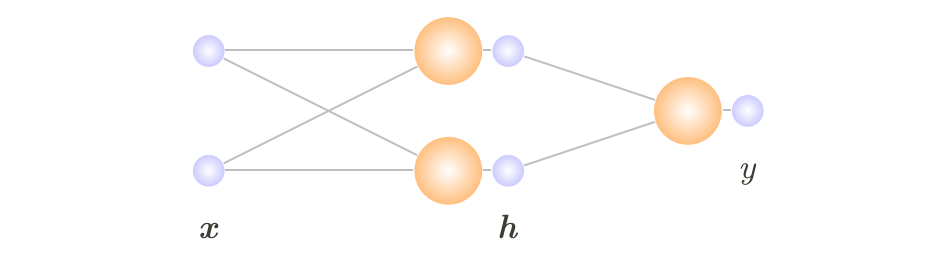</td>
            <td>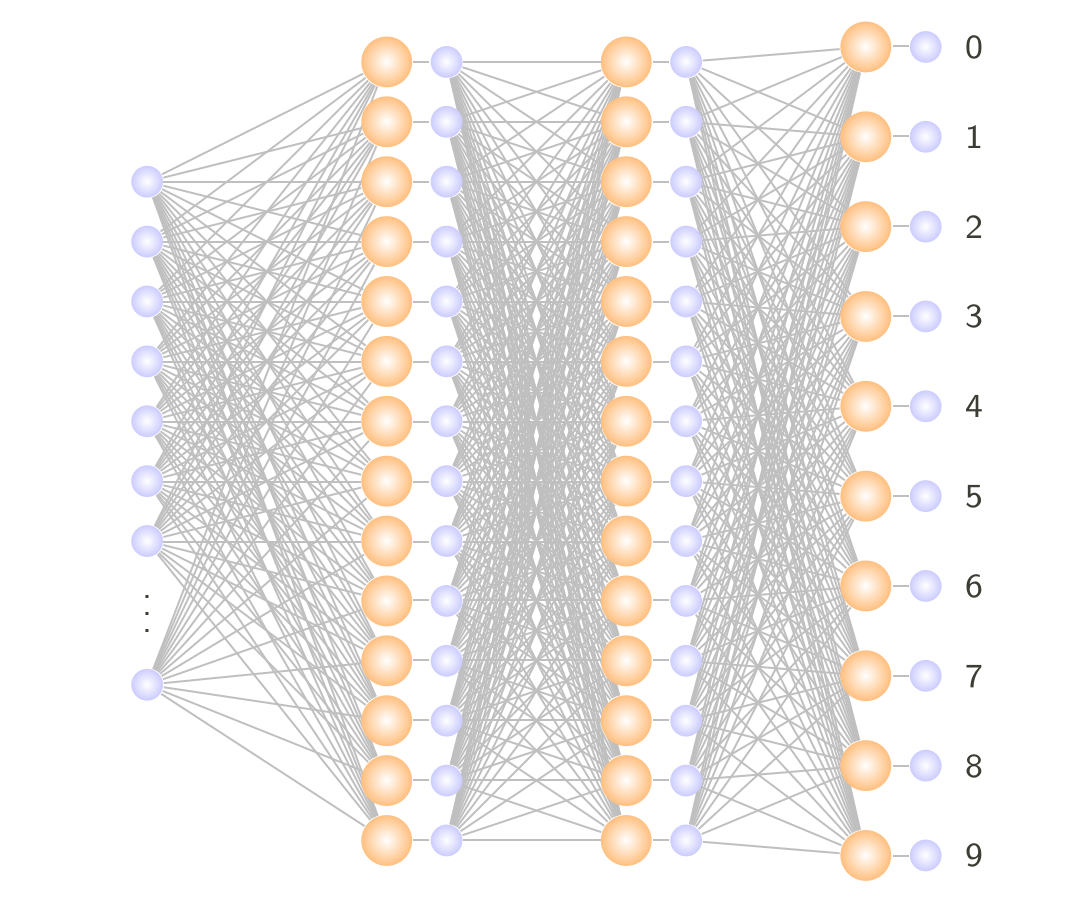</td>
        </tr>
    </table>
</div>

In the following exercise we explore the basic building blocks of deep learning: the perceptron and how to stack multiple perceptrons together into layers to build a neural network.

<div class="alert alert-block alert-danger">
    Set your python kernel to <code>02_intro_dl</code>
</div>

### Acknowledgements

This notebook was created by Nils Eckstein, Julia Buhmann, and Jan Funke.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5)

## Part 1: Perceptrons

<div>
    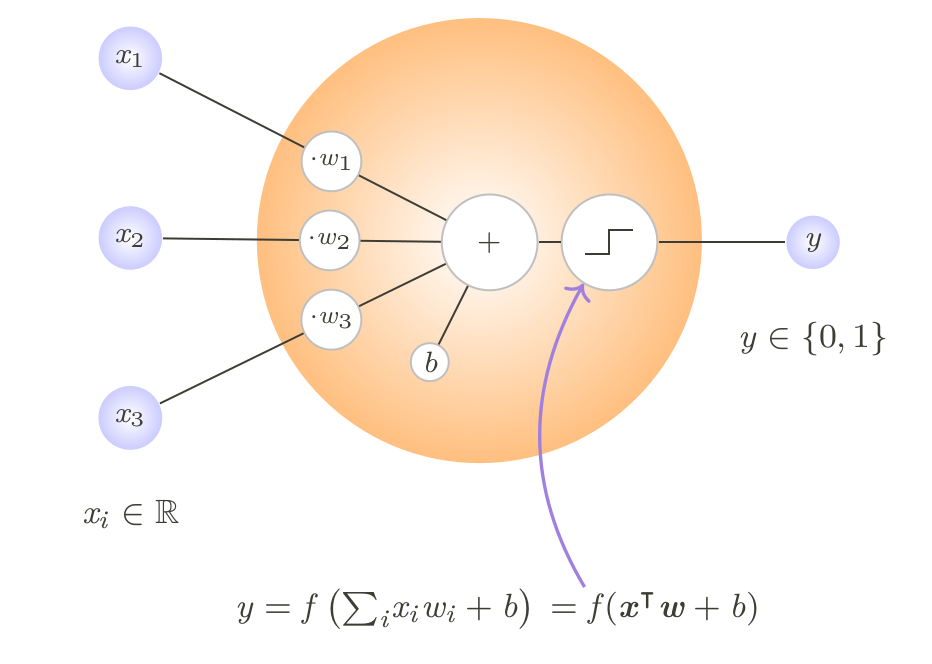
</div>

As we saw in the lecture ["Introduction to Deep Learning"](intro_dl_lecture.pdf), a perceptron is a simple unit that combines its inputs $x_i$ in a linear fashion (using weights $w_i$ and a bias $b$), followed by a non-linear function $f$.

<div class="alert alert-block alert-info">
    <b>Task 1</b>: Implement a Perceptron Function
</div>

Using only `numpy`, write a function `perceptron(x, w, b, f)` that returns `y` as computed by a perceptron, for arbitrary inputs `x` of dimension `n`. The arguments of your function should be:

* `x`: the input of the perceptron, a `numpy` array of shape `(n,)`
* `w`: the weights of the perceptron, a `numpy` array of shape `(n,)`
* `b`: a single scalar value for the bias
* `f`: a nonlinear function $f: \mathbb{R}\mapsto\mathbb{R}$

Test your perceptron function on 2D inputs (i.e., `n=2`) and plot the result. Change the weights, bias, and the function $f$ and see how the output of the perceptron changes.

In [2]:
def non_linearity(a):
    ''' Impliment your nonlinear function here '''
    return a > 0

In [3]:
def perceptron(x, w, b, f):
    '''Implement your solution here.'''
    #hint: see above for equation
    return f(np.sum(x * w) + b)

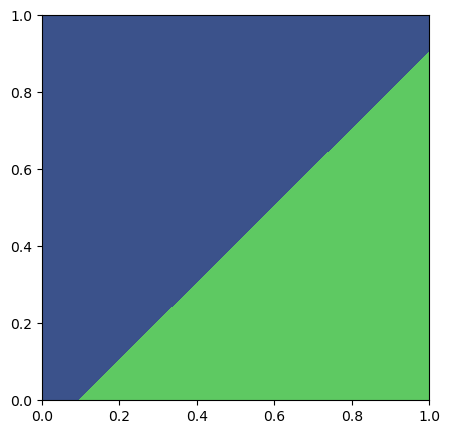

In [4]:
def plot_perceptron(w, b, f):
    
    num_samples = 100
    domain_x1 = (0.0, 1.0)
    domain_x2 = (0.0, 1.0)
    
    domain = np.meshgrid(
        np.linspace(*domain_x1, num_samples),
        np.linspace(*domain_x2, num_samples)
    )    
    xs = np.array([domain[0].flatten(), domain[1].flatten()]).T
    
    values = np.array([
        perceptron(x, w, b, f)
        for x in xs
    ])
    
    plt.contourf(domain[0], domain[1], values.reshape(num_samples, num_samples))

# the following should show a linear classifier that is True (shown as green)
# for values below a line starting at (0.1, 0) through (1.0, 0.9) 
plot_perceptron(w=[1.0, -1.0], b=-0.1, f=non_linearity)

<div class="alert alert-block alert-success">
<h2> Checkpoint 1 </h2>

We will go over different ways to implement the perceptron together and discuss their efficiency. If you arrived here earlier, feel free to play around with the parameters of the perceptron (the weights and bias) as well as the activation function `f`.

Time: 20 working, + 10 discussion
</div>

<div class="alert alert-block alert-info">
    <h2>Task 2</h2>
    
Create a 2-Layer Network for XOR
</div>

XOR is a fundamental logic gate that outputs `1` whenever there is an odd number of `1` in its input and `0` otherwise. For two inputs this can be thought of as an "exclusive or" operation and the associated boolean function is fully characterized by the following truth table.

| x1 | x2 | y = XOR(x1, x2) |
|---|---|----------|
| 0 | 0 |    0     |
| 0 | 1 |    1     |
| 1 | 0 |    1     |
| 1 | 1 |    0     |

The function of an XOR gate can also be understood as a classification problem on $x \in \{0,1\}^2$ and we can think about designing a classifier acting as an XOR gate. It turns out that this problem is not solvable by a single perceptron (https://en.wikipedia.org/wiki/Perceptron) because the set of points $\{(0,0), (0,1), (1,0), (1,1)\}$ is not linearly seperable.

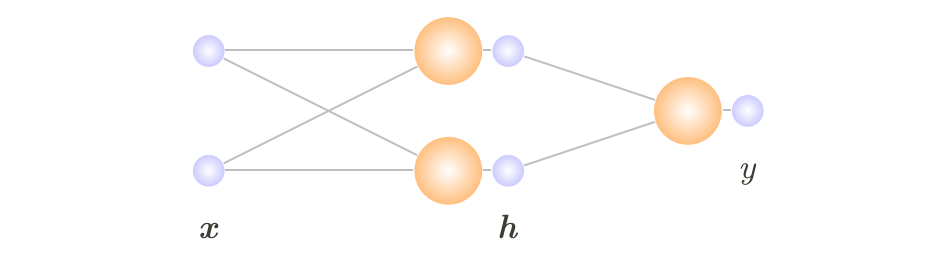

Design a two layer perceptron using your `perceptron` function above that implements an XOR Gate on two inputs. Think about the flow of information through this simple network and set the weight values by hand such that the network produces the XOR function.

#### Hint

A single layer in a multilayer perceptron can be described by the equation $y = f(x^\intercal w + b)$ with $f$ a nonlinear function. $b$ is the so called bias, a constant offset vector and $w$ a vector of weights. Since we are only interested in outputs of `0` or `1`, a good choice for $f$ is the threshold function. Think about which kind of logical operations you can implement with a single perceptron, then see how you can combine them to create an XOR. It might help to write down the equation for a two layer perceptron network.

In [5]:
def generate_xor_data():
    xs = [np.array([i, j]) for i in [0,1] for j in [0,1]]
    ys = [int(np.logical_xor(x[0], x[1])) for x in xs]
    return xs, ys
    
def xor(x):
    """
    Implement your solution here.
    """
    
    # We will refer to the weights and bias of the two perceptrons in the first layer
    # as w11 and b11, and the weights and bias of the perceptron in the last layer
    # as w2 and b2. Change their values below such that the whole network implements
    # the XOR function. You will also have to change the activation function f used
    # for the perceptrons (which currently is the identity).
    
    # TASK
    w11 = [0.0, 0.0]
    b11 = 0.0
    w12 = [0.0, 0.0]
    b12 = 0.0
    w2 = [0.0, 0.0]
    b2 = 0.0
    f = lambda a: a
    
    # SOLUTION
    w11 = [0.1, 0.1]
    b11 = -0.05
    w12 = [0.1, 0.1]
    b12 = -0.15
    w2 = [0.1, -0.1]
    b2 = -0.05
    f = lambda a: a > 0
    
    # output of the two perceptrons in the first layer
    h1 = perceptron(x, w=w11, b=b11, f=f)
    h2 = perceptron(x, w=w12, b=b12, f=f)
    # output of the perceptron in the last layer
    y = perceptron(np.array([h1, h2]), w=w2, b=b2, f=f)  # h1 AND NOT h2
    
    return y

def test_xor():
    xs, ys = generate_xor_data()
    for x, y in zip(xs, ys):
        print(f"XOR of {x} is {y}, your implementation returns {xor(x)}")
    for x, y in zip(xs, ys):
        assert y == xor(x), f"xor function returned {xor(x)} for input {x}, but should be {y}"
    print()
    print("Congratulations! Your implementation is correct :)")

test_xor()

XOR of [0 0] is 0, your implementation returns False
XOR of [0 1] is 1, your implementation returns True
XOR of [1 0] is 1, your implementation returns True
XOR of [1 1] is 0, your implementation returns False

Congratulations! Your implementation is correct :)


<div class="alert alert-block alert-success">
<h2> Checkpoint 2 </h2>

There are many ways to implement an XOR in a two-layer perceptron. We will review some of them and how we got to them (trial and error or pen and paper?).
    
<br/>
If you arrive here early, think about how to generalize the XOR function to an arbitrary number of inputs. For more than two inputs, the XOR returns True if the number of 1s in the inputs is odd, and False otherwise.

Time: 30 working + 15 min discussion
</div>

## Part 2: "Deep" Neural Networks

<div>
    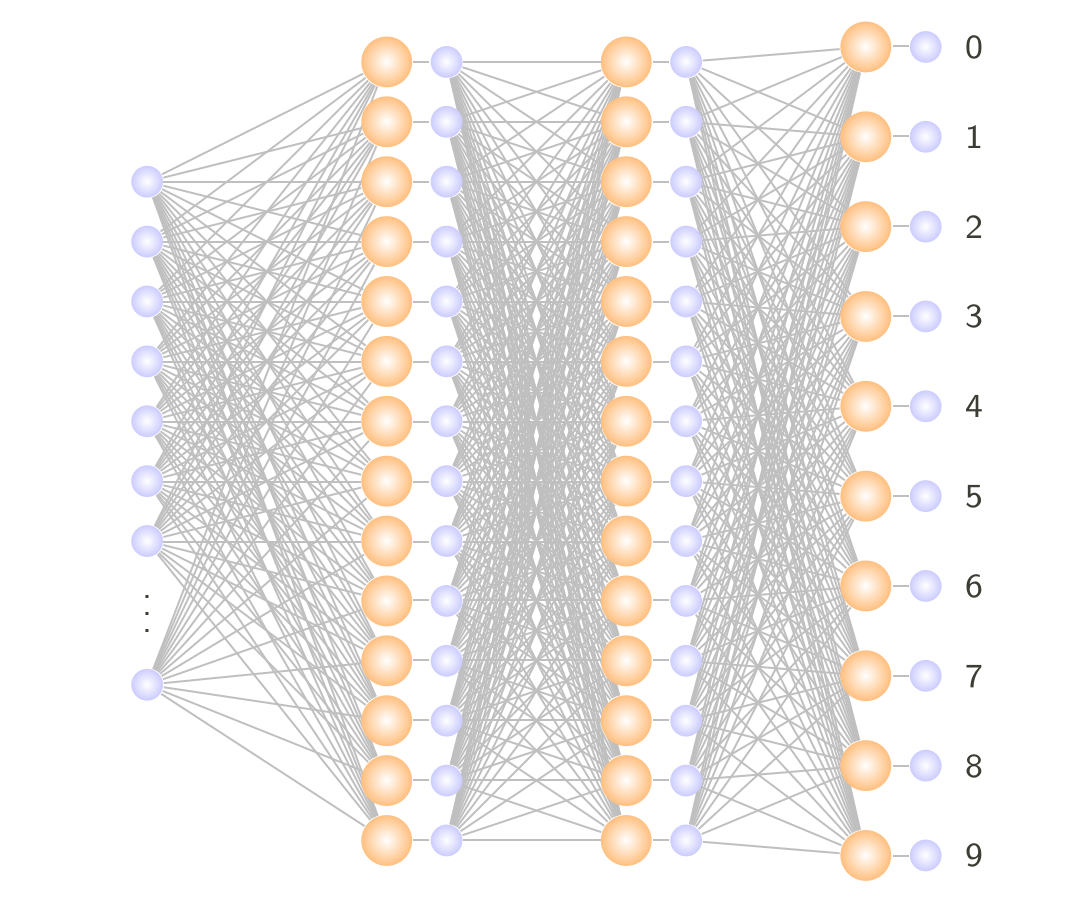
</div>

<div class="alert alert-block alert-info">
    <h2>Task 3</h2>

Use Keras to Train a Simple Network
</div>

The previous task demonstrated that chosing the weights of a neural network by hand can be quite painful even for simple functions. This will certainly get out of hand once we have more complex networks with several layers and many neurons per layer. But more importantly, the reason why we want to use neural networks to approximate a function is that (in general) we do not know exactly what the function is. We only have data points that describe the function implicitly.

In this task, we will design, train, and evaluate a neural network that can classify points of two different classes on a 2D plane, i.e., the input to our network are the coordinates of points in a plane.

For that, we will create a training and a testing dataset. We will use stochastic gradient descent to train a network on the training dataset and evaluate its performance on the testing dataset.

#### Data

We create both training and testing dataset from the following function (in practice, we would not know this function but have only the data available):

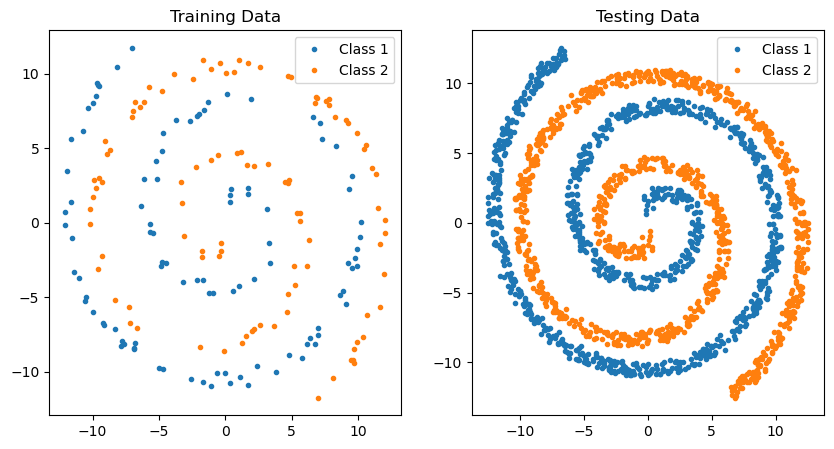

In [6]:
def generate_spiral_data(n_points, noise=1.0):
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

def plot_points(Xs, ys, titles):
    num_subplots = len(Xs)
    plt.subplots(1, num_subplots, figsize=(5 * num_subplots, 5))
    for i, (X, y, title) in enumerate(zip(Xs, ys, titles)):
        plt.subplot(1, num_subplots, i + 1)
        plt.title(title)
        plt.plot(X[y==0, 0], X[y==0, 1], ".", label="Class 1")
        plt.plot(X[y==1, 0], X[y==1, 1], ".", label="Class 2")
        plt.legend()
    plt.show()

X_train, y_train = generate_spiral_data(100)
X_test, y_test = generate_spiral_data(1000)

plot_points([X_train, X_test], [y_train, y_test], ["Training Data", "Testing Data"])

<div class="alert alert-block alert-info">
    <b>Task 3.1</b>: Improve the Baseline Model
</div>


We will start with a simple baseline model, consisting of one hidden layer with 12 neurons (or perceptrons).

This baseline model performs pretty poorly. Try to find a more advanced architecture that is able to solve the classification problem. Read the following code snippet and understand the involved functions:

2023-08-20 16:35:25.084471: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


63/63 [==============================] - 0s 303us/step


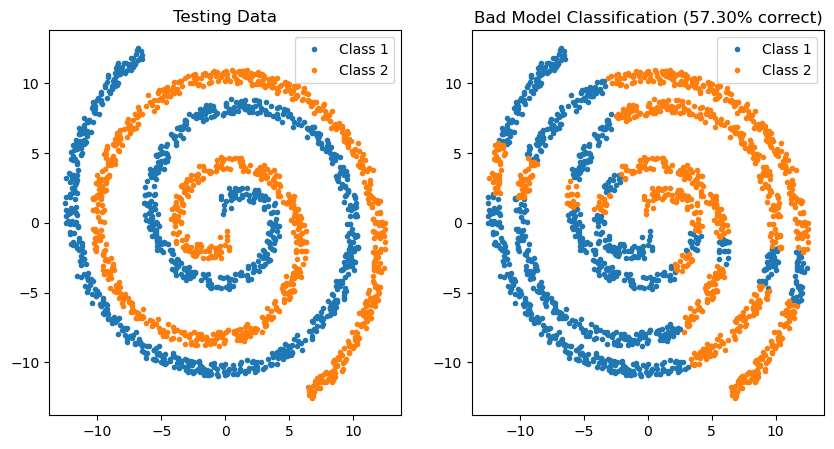

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

bad_model = Sequential()
bad_model.add(Dense(12, input_dim=2, activation='tanh'))
bad_model.add(Dense(1, activation='sigmoid'))

bad_model.compile(loss='mean_squared_error',
                  optimizer='SGD', # SGD = Stochastic Gradient Descent
                  metrics=['accuracy'])

# Train the model
bad_model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=0)

# Predict on the testing data
bad_prediction = np.round(bad_model.predict(X_test).T[0])

accuracy = np.sum(bad_prediction == y_test) / len(y_test)

plot_points(
    [X_test, X_test],
    [y_test, bad_prediction],
    ["Testing Data", f"Bad Model Classification ({accuracy * 100:.2f}% correct)"])

Vary width and depth of the network and play around with activation functions, loss functions, and optimizers to achieve a better result. Read up on parameters and functions for sequential models at https://keras.io/getting-started/sequential-model-guide/. Use the next cell for your solution:

63/63 [==============================] - 0s 335us/step


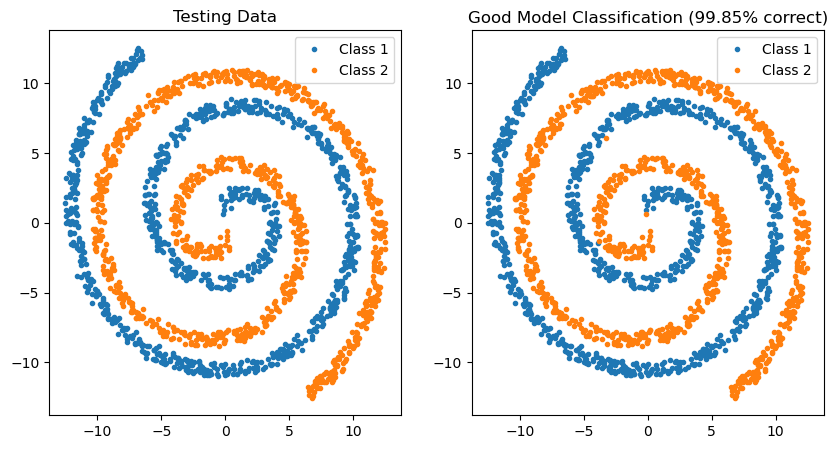

In [8]:
"""
Create a "good" model that perorms better than the baseline model above
"""
# hint: add dense layers as before
# what type of activation function(s) might give better results? 
# do more dense layers improve the results?
# does using a different loss and optimizer help?

good_model = Sequential()
# implement your model here

# SOLUTION
good_model = Sequential()
good_model.add(Dense(64, input_dim=2, activation='relu'))
good_model.add(Dense(64, activation='relu'))
good_model.add(Dense(64, activation='relu'))
good_model.add(Dense(1, activation='sigmoid'))
good_model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy'])

# Train the model
good_model.fit(X_train, y_train, epochs=1500, batch_size=10,  verbose=0)

# Predict on the testing data
good_prediction = np.round(good_model.predict(X_test).T[0])

accuracy = np.sum(good_prediction == y_test) / len(y_test)

plot_points(
    [X_test, X_test],
    [y_test, good_prediction],
    ["Testing Data", f"Good Model Classification ({accuracy * 100:.2f}% correct)"]
)

<div class="alert alert-block alert-info">
    <b>Task 3.2</b>: Visualize Your Model
</div>

The next cell visualize the output of your model for all 2D inputs with coordinates between 0 and 1, similar to how we plotted the output of the perceptron in **Task 1**. Change the code below to show the domain -15 to 15 for both input dimensions and compare the outputs of the `bad_model` model with yours. See also how the model performs outside the intervals it was trained on by increasing the domain even further.

Looking at the classifier on an extended domain, what observations can you make?

1250/1250 [==============================] - 0s 325us/step


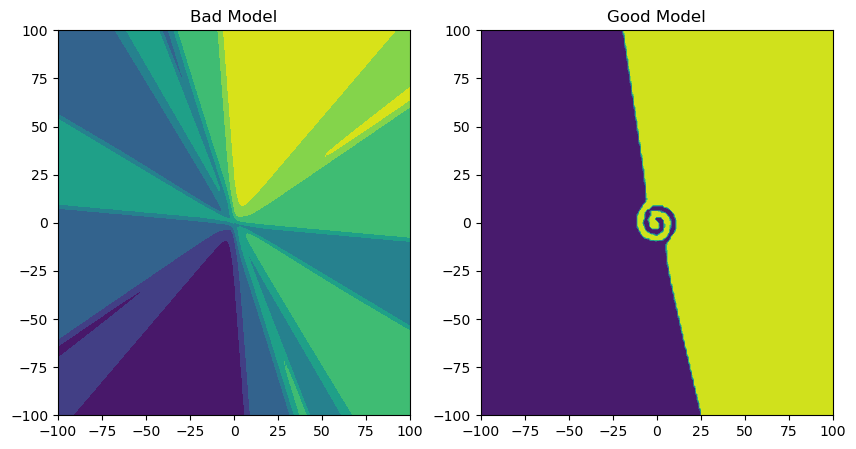

In [9]:
def plot_classifiers(classifier_1, classifier_2):
    
    plt.subplots(1, 2, figsize=(10, 5))

    num_samples = 200
    # change the plotted domain here
    domain_x1 = (0.0, 1.0)
    domain_x2 = (0.0, 1.0)
    
    # SOLUTION
    domain_x1 = (-100.0, 100.0)
    domain_x2 = (-100.0, 100.0)
    
    domain = np.meshgrid(
        np.linspace(*domain_x1, num_samples),
        np.linspace(*domain_x2, num_samples)
    )    
    xs = np.array([domain[0].flatten(), domain[1].flatten()]).T
    
    values_1 = classifier_1.predict(xs)
    values_2 = classifier_2.predict(xs)
    
    plt.subplot(1, 2, 1)
    plt.title("Bad Model")
    plt.contourf(domain[0], domain[1], values_1.reshape(num_samples, num_samples))
    
    plt.subplot(1, 2, 2)
    plt.title("Good Model")
    plt.contourf(domain[0], domain[1], values_2.reshape(num_samples, num_samples))
    
    plt.show()

plot_classifiers(bad_model, good_model)

<div class="alert alert-block alert-success">
<h2> Checkpoint 3</h2>

Let us know in the exercise channel when you got here and what accuracy your model achieved. We will compare different solutions and discuss why some of them are better than others. We will also discuss the generalization behaviour of the classifier outside of the domain it was trained on.

Time: 60 working + 15 discussion
</div>

<div class="alert alert-block alert-info">
    <h2>Task 4</h2>

Classify Hand-Written Digits
</div>

In this task, we will classify data points of higher dimensions: Each data point is now an image of size 28 by 28 pixels depicting a hand-written digit from the famous MNIST dataset.

Instead of feeding the image as one long vector into a fully connected network (as in the previous task), we will take advantage of the spatial information in images and use a convolutional neural network. As a reminder, a convolutional neural network differs from a fully connected one in that not each pair of nodes is connected, and weights are shared between nodes in one layer:

<div>
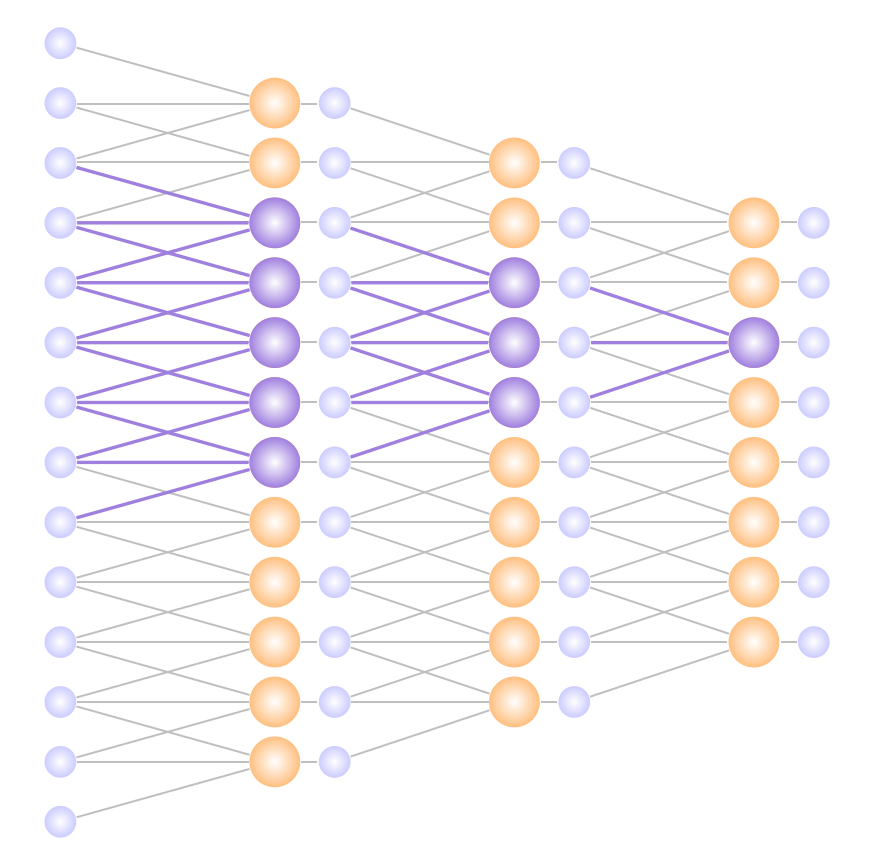
</div>

However, the output of our network will be a 10-dimensional vector, indicating the probabilities for the input to be one of ten classes (corresponding to the digits 0 to 9). For that, we will use fully connected layers at the end of our network, once the dimensionality of a feature map is small enough to capture high-level information.

In principle, we could just use convolutional layers to reduce the size of each feature map by 2 until one feature map is small enough to allow using a fully connected layer. However, it is good practice to have a convolutional layer followed by a so-called downsampling layer, which effectively reduces the size of the feature map by the downsampling factor.

### Data

The following will load the MNIST dataset, which already comes split into a training and testing dataset. We split the training data further into training and validation and show a few samples in the next cell:

Training data has 48000 samples
Validation data has 12000 samples
Testing data has 10000 samples


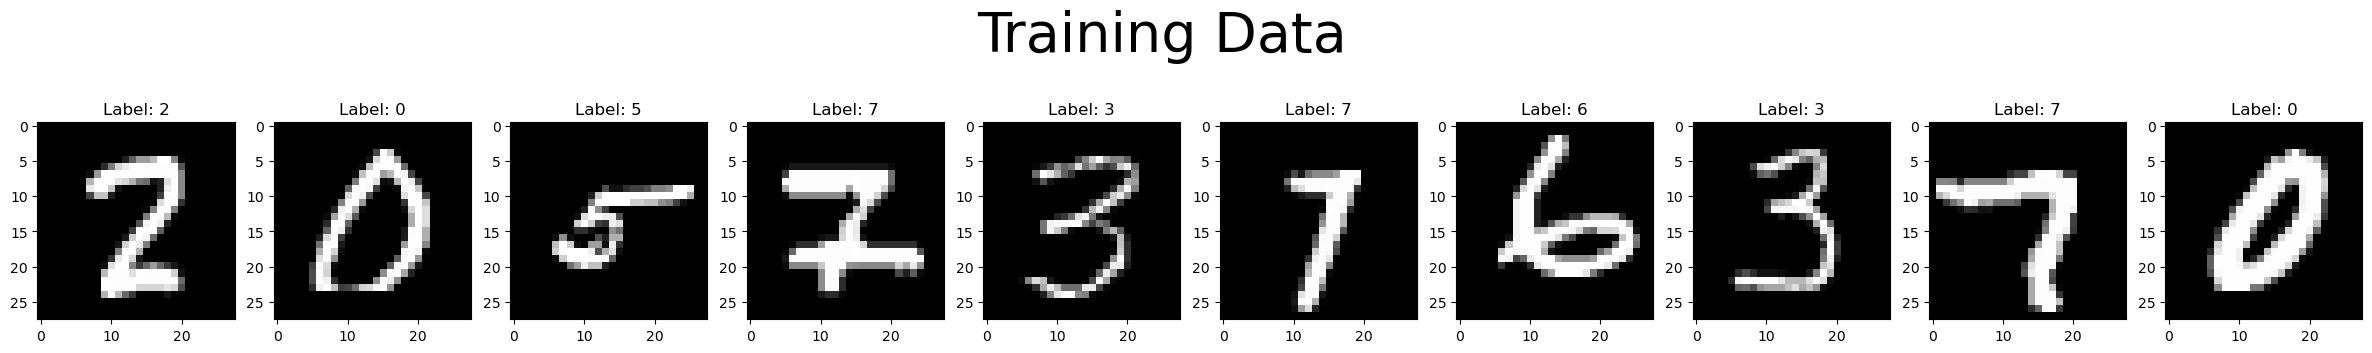

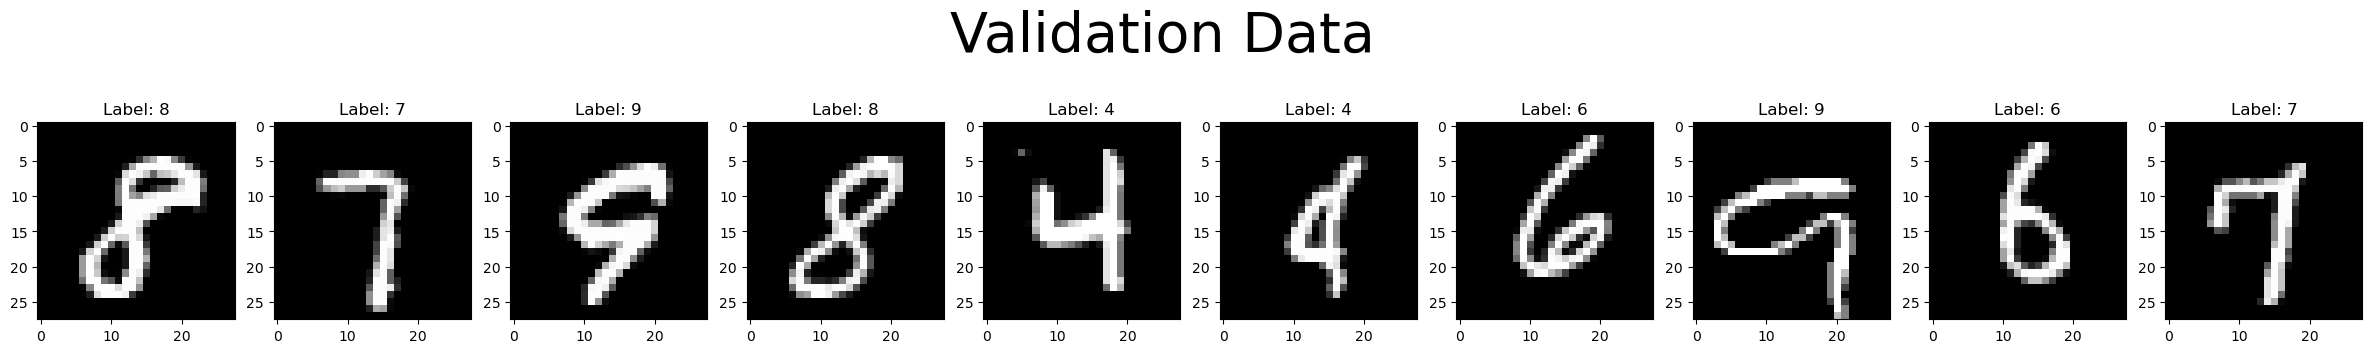

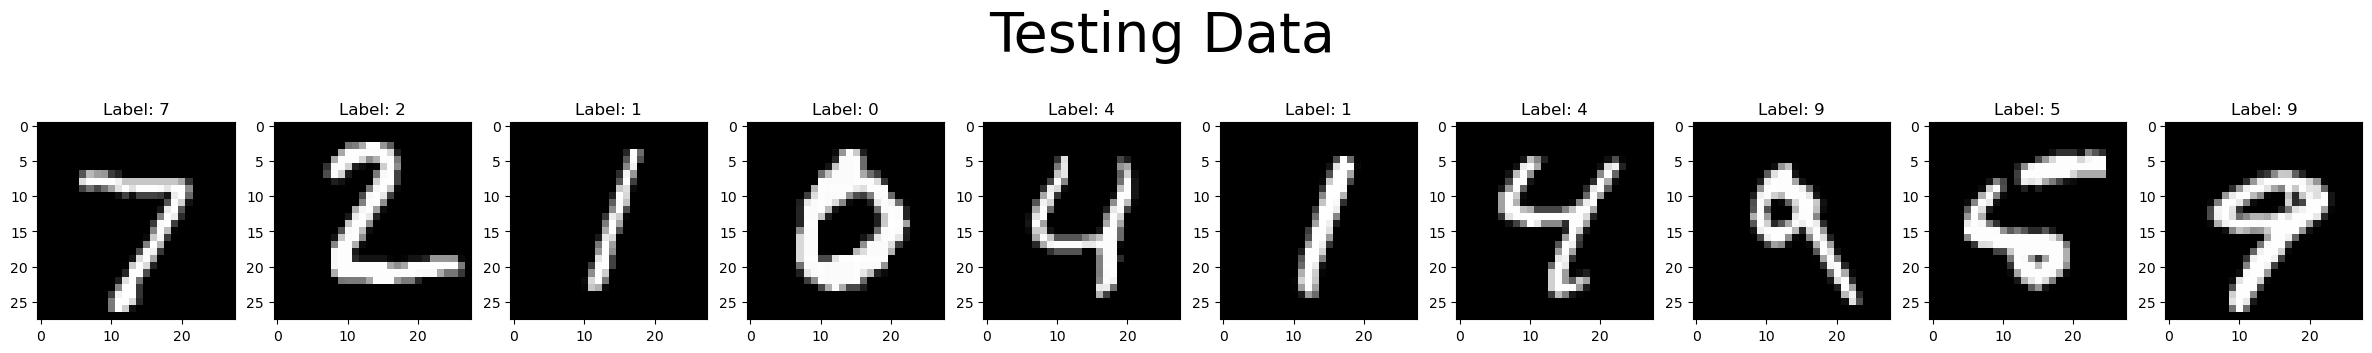

In [10]:
from tensorflow.keras.datasets import mnist

# get all training and testing images
(x_all_train, y_all_train), (x_test, y_test) = mnist.load_data()

# split the training data into a train and validation portion
np.random.seed(19120623)
num_all_train_samples = len(x_all_train)
random_indices = np.array(range(num_all_train_samples))
np.random.shuffle(random_indices)
train_indices = random_indices[:int(0.8 * num_all_train_samples)]
validation_indices = random_indices[int(0.8 * num_all_train_samples):]
x_train, x_validate = x_all_train[train_indices], x_all_train[validation_indices]
y_train, y_validate = y_all_train[train_indices], y_all_train[validation_indices]

print(f"Training data has {len(x_train)} samples")
print(f"Validation data has {len(x_validate)} samples")
print(f"Testing data has {len(x_test)} samples")

def show_samples(xs, ys, title):

    num_samples = len(xs)
    
    plt.subplots(1, num_samples, figsize=(3 * num_samples, 3))
    plt.suptitle(title, size=40, y=1.2)
    
    for i, (x, y) in enumerate(zip(xs, ys)):
        plt.subplot(1, num_samples, i + 1)
        plt.title(f"Label: {y}")
        plt.imshow(x, cmap=plt.get_cmap('gray'))
    plt.show()

show_samples(x_train[:10], y_train[:10], "Training Data")
show_samples(x_validate[:10], y_validate[:10], "Validation Data")
show_samples(x_test[:10], y_test[:10], "Testing Data")

<div class="alert alert-block alert-info">
    <b>Task 4.1</b>: Implement a Convolutional Neural Network
</div>

Create a CNN using `keras` layers with the following specifications:
* one convolution, size 3x3, 32 output feature maps, followed by a ReLU activation function
* one downsampling layer, size 2x2, via max-pooling
* one convolution, size 3x3, 32 output feature maps, followed by a ReLU activation function
* one downsampling layer, size 2x2, via max-pooling
* one densely connected layer with 64 units (the previous feature maps need to be flattened for that), followed by a ReLU activation function
* one densely connected layer with 10 units, followed by a SoftMax activation function (those will be the outputs of the network)

Each layer above has a corresonding `keras` implementation (e.g., a convolutional layer is implemented by [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)). Find the other layers by browsing the [keras documentation](https://keras.io/api/layers/)!

In [11]:
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dense
from tensorflow.keras.models import Sequential

height, width = x_train.shape[1], x_train.shape[2]
input_shape = (height, width, 1)

cnn_model = Sequential()
# implement your model here

# SOLUTION
cnn_model.add(Conv2D(filters=32,
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(filters=32,
                     kernel_size=(3, 3),
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax')) # softmax for classification

cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

The last line in the previous cell prints a summary of your model. The number of trainable parameters should be 61,482.

<div class="alert alert-block alert-info">
    <b>Task 4.2</b>: Train the Network
</div>

Before we can train the CNN on the MNIST data, we have to bring the data in the right format. In particular:
* the images should have a "channel" dimension of size 1
* the intensities should be rescaled to values between 0 and 1
* the labels have to be converted into one-hot encodings

These changes are needed to fit to the CNN created above. The following cell does that:

In [12]:
from tensorflow.keras.utils import to_categorical

def convert_x(x):
    if len(x.shape) == 4:
        # already converted
        return x
    x = x.reshape(x.shape + (1,))
    return x.astype(np.float32) / 255.0

def convert_y(y):
    if len(y.shape) == 2:
        # already converted
        return y
    return to_categorical(y, 10)

x_train = convert_x(x_train)
x_validate = convert_x(x_validate)
x_test = convert_x(x_test)

# convert the labels into one-hot encodings
y_train = convert_y(y_train)
y_validate = convert_y(y_validate)
y_test = convert_y(y_test)

print("Train data shape: x =", x_train.shape, ", y =", y_train.shape)

Train data shape: x = (48000, 28, 28, 1) , y = (48000, 10)


We are ready to train the network!

Compile and fit your `cnn_model` similar to how we compiled the spiral classifier above, but:
* use categorial cross-entropy as the loss
* use Adam as the optimizer
* use a batch size of 128 samples
* train for 10 epochs

In [13]:
# compile and fit your model to x_train and x_validate


# SOLUTION
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
cnn_model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_data=(x_validate, y_validate))

Epoch 1/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2903 - accuracy: 0.9138 - val_loss: 0.0996 - val_accuracy: 0.9690
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0744 - accuracy: 0.9772 - val_loss: 0.0710 - val_accuracy: 0.9773
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0555 - accuracy: 0.9831 - val_loss: 0.0612 - val_accuracy: 0.9812
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.0616 - val_accuracy: 0.9799
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0475 - val_accuracy: 0.9843
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.0445 - val_accuracy: 0.9870
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0259 - accuracy: 0.9916 - val_loss: 0.0441 - val_accuracy: 0.9864

313/313 [==============================] - 1s 2ms/step
Testing accuracy: 0.99


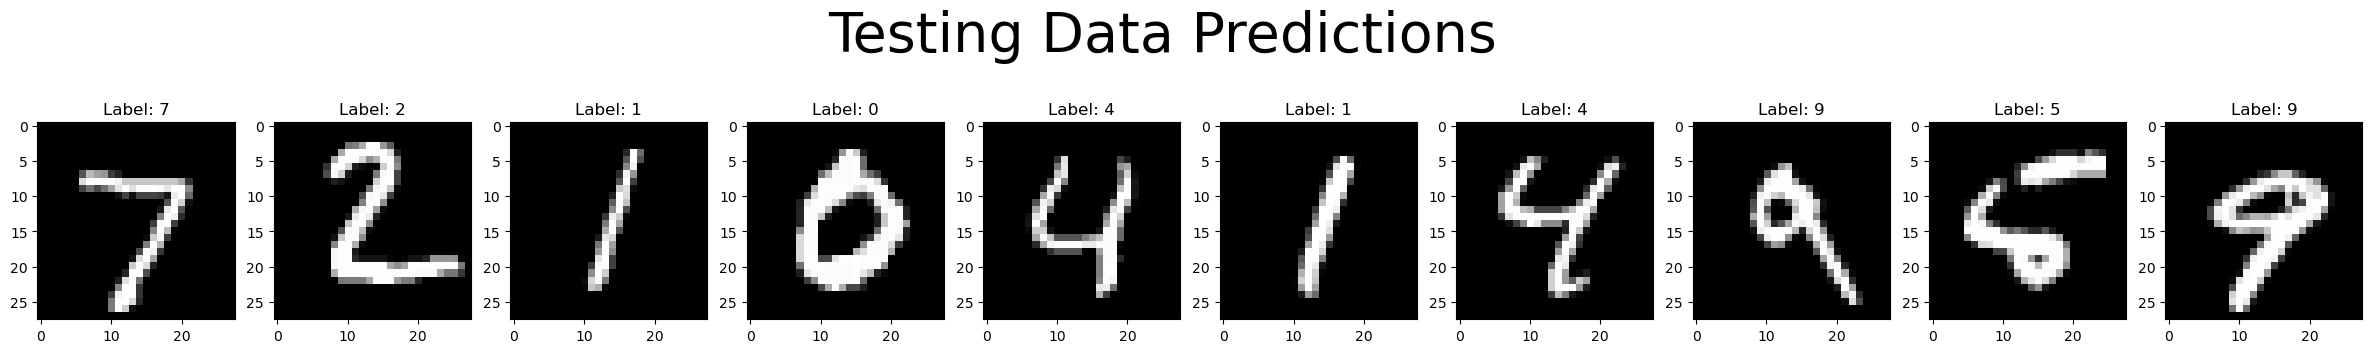

In [14]:
# evaluate the model on the testing dataset

y_test_predicted = cnn_model.predict(x_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1)
accuracy = np.sum(y_test_predicted == np.argmax(y_test, axis=1)) / len(y_test)
print(f"Testing accuracy: {accuracy}")
show_samples(x_test[:10], y_test_predicted[:10], "Testing Data Predictions")

<div class="alert alert-block alert-success">
<h2> Checkpoint 4</h2>

After 10 epochs, your model should achieve a training, validation, and test accuracy of around 90%. We will use this checkpoint to discuss why we use training, validation, and testing datasets in practice.

time: 65 working + 20 discussion
</div>